<a href="https://colab.research.google.com/github/G-Shillcock/Division_of_Labour/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from sympy import symbols, Eq, IndexedBase, Sum, solve

#### Define model parameters

μ = symbols('μ')                            # shareability
a, b = symbols('a, b', positive=True)       # task elasticities
k = symbols('k', positive=True)             # workaround so that n >=2
n = k + 2                                   # group size
i, j = symbols('i, j', integer=True)        # group member indices
t = IndexedBase('t')                        # allocation to task A
t_A = symbols('t_A')                        # optimum undivided allocation
A = IndexedBase('A')                        # performances in task A
B = IndexedBase('B')                        # performances in task B

#### Define fitness

W = (1-μ)*Sum(A[i]*B[i]/n,(i,0,n-1)) + μ*Sum(A[i]*B[j]/(n**2),(i,0,n-1),(j,0,n-1))
W = W.doit()
W = W.replace(A[i], t[i]**a).replace(B[j],(1-t[j])**b).replace(B[i],(1-t[i])**b).doit()
display(Eq(symbols('W'), W))

Eq(W, μ*Sum((1 - t[j])**b*t[i]**a/(k + 2)**2, (i, 0, k + 1), (j, 0, k + 1)) + (1 - μ)*Sum((1 - t[i])**b*t[i]**a/(k + 2), (i, 0, k + 1)))

In [3]:
#### Find the optimum undivided allocation. This is presumed to be the ancestoral state.

W_A = W.replace(t[i],t_A).replace(t[j],t_A).doit()
display(Eq(t_A,solve(W_A.diff(t_A),t_A)[0]))

Eq(t_A, a/(a + b))

In [4]:
#### Find the critical value of the second-derivative at the ancestral state, in a direction towards unequal allocation i.e. division of labour.

W00 = W.diff(t[0],t[0]).replace(t[i],t_A).replace(t[j],t_A).simplify()
W10 = W.diff(t[1],t[0]).replace(t[i],t_A).replace(t[j],t_A).simplify()
W01 = W.diff(t[0],t[1]).replace(t[i],t_A).replace(t[j],t_A).simplify()
W11 = W.diff(t[1],t[1]).replace(t[i],t_A).replace(t[j],t_A).simplify()

concavity = (W00+W11-W01-W10).subs(t_A, a/(a+b)).simplify()
sol = solve(concavity,b)[0]
display(Eq(b,sol))

Eq(b, a/(2*a*μ - 1))

In [5]:
#### Rearranging gives the formular from the paper.
display(Eq(2/(1/a+1/b),(2/(1/sol+1/a)).simplify()))

Eq(2/(1/b + 1/a), 1/μ)

If division of labour is favourable, what is the optimal allocation?

In [125]:
n=5
W.subs({μ:1,k:n-2,a:2,b:3}).doit()

((1 - t[0])**3 + (1 - t[1])**3 + (1 - t[2])**3 + (1 - t[3])**3 + (1 - t[4])**3)*(t[0]**2/25 + t[1]**2/25 + t[2]**2/25 + t[3]**2/25 + t[4]**2/25)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.2222222222222222
       x: [ 0.000e+00  1.000e+00  0.000e+00]
     nit: 9
     jac: [ 3.333e-01 -4.444e-01  3.333e-01]
    nfev: 36
    njev: 9
0 0.2222222222222222


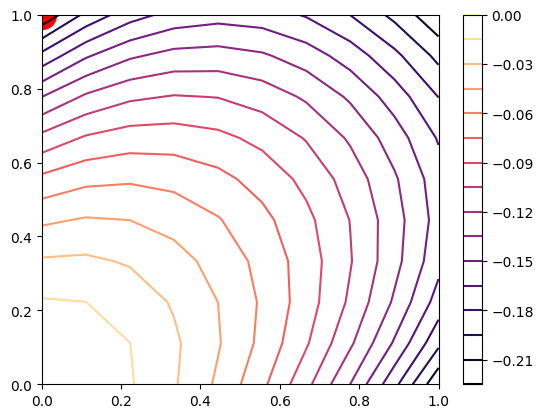

1 0.2222222222222222


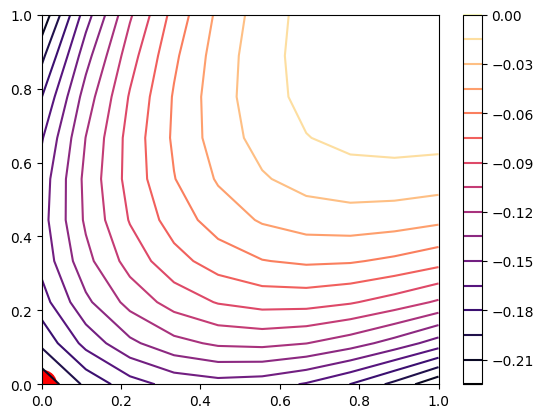

In [186]:
from sympy import print_latex, lambdify
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

n = 3
initial = np.ones(n)/n + np.random.normal(0, .01, size=n)

def fit(t):
    return -sum((1-tval)**3 for tval in t)*sum(tval**2 for tval in t)/len(t)**2


result = minimize(fit, initial,
                  bounds=tuple((0,1) for _ in initial),
                  constraints=({'type': 'eq', 'fun': lambda t:  1 - sum(t)})
                  )

print(result)

# print(np.round(result.x).astype(int))

for t2 in [0,1]:
    t0_values = np.linspace(0, 1, 10)
    t1_values = np.linspace(0, 1, 10)
    t0_mesh, t1_mesh = np.meshgrid(t0_values, t1_values)

    z_values = fit([t0_mesh, t1_mesh, t2])
    shape = z_values.shape
    maxi = np.unravel_index(np.argmax(-z_values), shape)
    plt.plot(t0_values[maxi[0]],t1_values[maxi[1]],'o', markersize=20, color='red')
    contour_plot = plt.contour(t0_mesh, t1_mesh, z_values, levels=20, cmap='magma')

    colorbar = plt.colorbar(contour_plot)
    print(t2,np.max(-z_values))

    plt.show()
